In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb # <--- ЗМІНА
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

# Налаштування візуалізацій
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 8)

# Завантажуємо наш фінальний датасет з усіма ознаками
data_path = '../data/dataset_for_modeling.csv'
df = pd.read_csv(data_path, index_col='DateTime', parse_dates=True)

print("Фінальний датасет успішно завантажено. Розмір:", df.shape)
df.head()

Фінальний датасет успішно завантажено. Розмір: (4912, 37)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,is_anomaly,hour,day_of_week,...,Global_active_power_roll_mean_12,Global_active_power_roll_std_12,Global_active_power_roll_mean_24,Global_active_power_roll_std_24,Global_active_power_roll_mean_168,Global_active_power_roll_std_168,is_holiday,temperature,humidity,wind_speed
DateTime,,,,,,,,,,,,,,,,,,,,,
2006-12-24 15:00:00,47.476,4.238,243.111538,15.230769,393.0,242.0,0.0,0,15,6,...,0.000000,0.000000,40.984667,84.989584,14.817560,45.796409,0,1.845061,85.775188,4.544693
2006-12-24 16:00:00,63.618,4.220,243.766667,12.695238,412.0,38.0,150.0,0,16,6,...,3.956333,13.705141,42.962833,84.545525,14.349155,45.046998,0,3.482138,44.347747,8.570005
2006-12-25 11:00:00,79.308,3.826,237.968750,20.837500,581.0,0.0,278.0,0,11,0,...,0.000000,0.000000,4.628917,15.862145,12.981619,43.531523,1,3.679528,86.284472,7.477884
2006-12-25 12:00:00,171.328,18.812,240.898596,12.842105,1359.0,0.0,272.0,0,12,0,...,6.609000,22.894248,7.933417,21.948993,13.453690,43.818976,1,5.943542,78.477735,3.966380
2006-12-25 13:00:00,97.054,3.166,240.593333,13.720000,1122.0,4.0,0.0,0,13,0,...,20.886333,52.577368,15.072083,39.832387,14.473500,45.466690,1,4.179815,65.002419,4.257566


In [2]:
# Визначаємо цільову змінну (y) та ознаки (X)
TARGET_COLUMN = 'Global_active_power'

X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

# Розділяємо дані. Для ML-моделей можна використовувати стандартний train_test_split,
# але для часових рядів краще розділяти вручну, щоб зберегти порядок.
split_point = '2010-01-01'
X_train, X_test = X.loc[:split_point], X.loc[split_point:]
y_train, y_test = y.loc[:split_point], y.loc[split_point:]

print(f"Розмір тренувального набору (X_train): {X_train.shape}")
print(f"Розмір тестового набору (X_test): {X_test.shape}")

Розмір тренувального набору (X_train): (3860, 36)
Розмір тестового набору (X_test): (1057, 36)


In [3]:
# Ініціалізуємо модель LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=500, # <--- ЗМІНА
                              learning_rate=0.05,
                              random_state=42,
                              n_jobs=-1)

print("Починаємо навчання моделі LightGBM...")
lgb_model.fit(X_train, y_train)
print("Навчання завершено.")

Починаємо навчання моделі LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6763
[LightGBM] [Info] Number of data points in the train set: 3860, number of used features: 36
[LightGBM] [Info] Start training from score 90.277988
Навчання завершено.


LightGBM Mean Absolute Error (MAE): 8.49
LightGBM Root Mean Squared Error (RMSE): 12.84


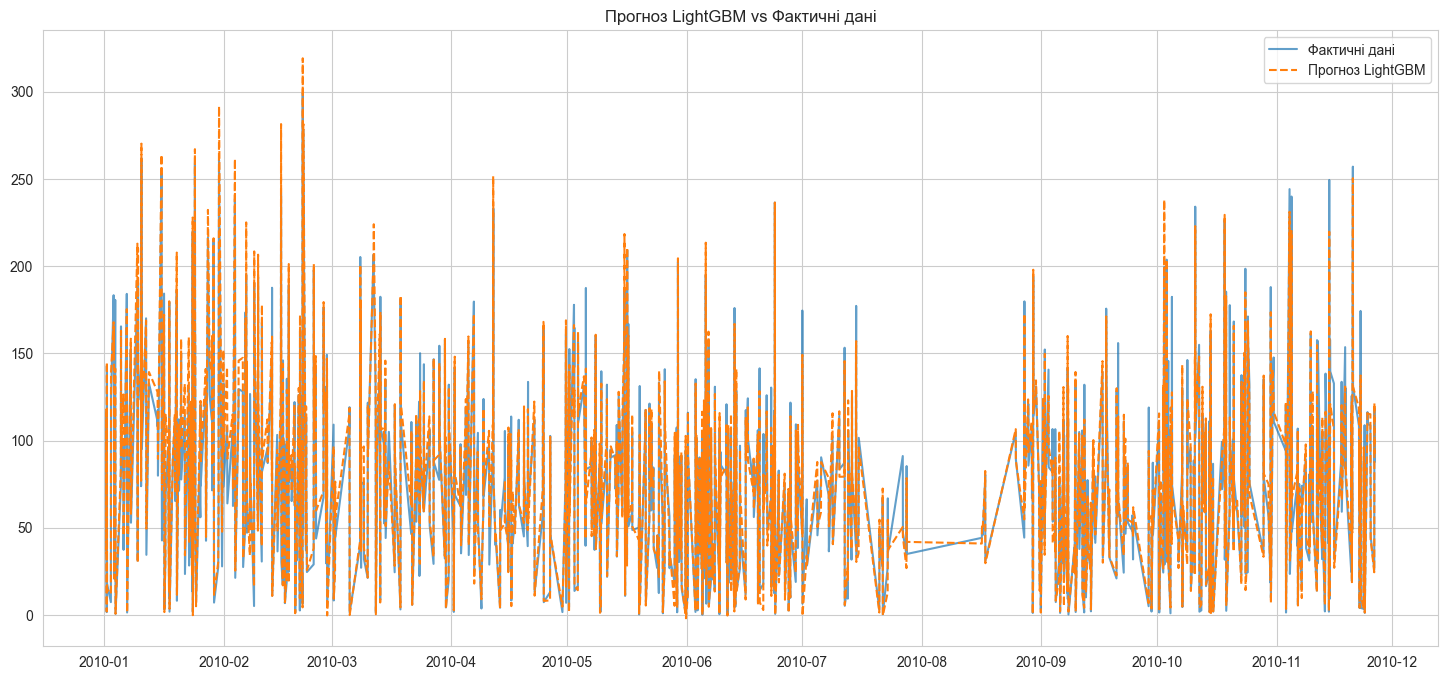

In [4]:
# Робимо прогноз на тестових даних
predictions_rf = lgb_model.predict(X_test)

# Оцінка точності
mae_rf = mean_absolute_error(y_test, predictions_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_rf))

print(f"LightGBM Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"LightGBM Root Mean Squared Error (RMSE): {rmse_rf:.2f}")

# Візуалізація результатів
plt.plot(y_test.index, y_test, label='Фактичні дані', alpha=0.7)
plt.plot(y_test.index, predictions_rf, label='Прогноз LightGBM', linestyle='--')
plt.title('Прогноз LightGBM vs Фактичні дані')
plt.legend()
plt.show()

/var/folders/qx/qcg8gq_95sj0ckv67r12b2yw0000gn/T/ipykernel_31351/780302082.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette='viridis')


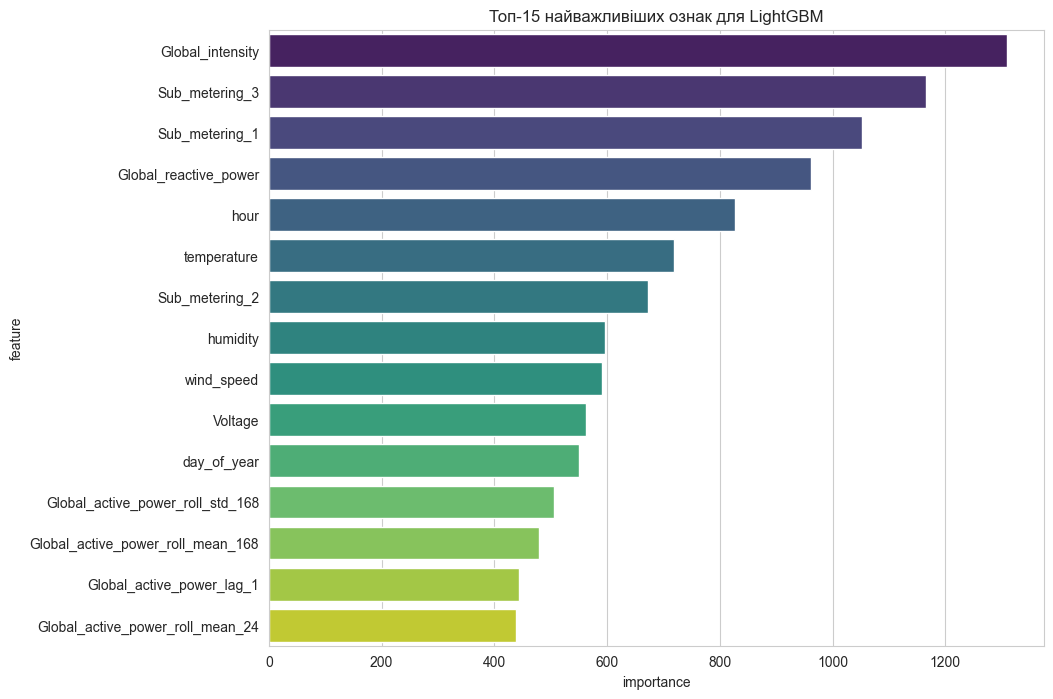

,feature,importance
2,Global_intensity,1309
5,Sub_metering_3,1166
3,Sub_metering_1,1052
0,Global_reactive_power,962
7,hour,827
33,temperature,719
4,Sub_metering_2,672
34,humidity,596
35,wind_speed,591
1,Voltage,563


In [5]:
# Створюємо DataFrame з важливістю ознак
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# Візуалізуємо топ-15 найважливіших ознак
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette='viridis')
plt.title('Топ-15 найважливіших ознак для LightGBM')
plt.show()

display(feature_importances.head(10))

In [6]:
joblib.dump(lgb_model, '../models/light_gbm_model.pkl')
print("Модель LightGBM успішно збережена.")

Модель LightGBM успішно збережена.
